In [1]:
import numpy as np
import matplotlib.pyplot as plt
from obspy.core import read

In [7]:
times = []
EW_data = []
NS_data = []
UD_data = []

In [5]:
with open ('datos_sismologicos/MOQ001_20010623153300.txt', 'r', encoding='latin-1') as file:
    lines = file.readlines()[37:]

In [8]:
for line in lines:
    if line.strip():
        parts = line.split()
        times.append(float(parts[0]))
        EW_data.append(float(parts[1]))
        NS_data.append(float(parts[2]))
        UD_data.append(float(parts[3]))

In [9]:
times = np.array(times)
EW_data = np.array(EW_data)
NS_data = np.array(NS_data)
UD_data = np.array(UD_data)

In [10]:
from obspy import Trace, Stream, UTCDateTime

station = 'MOQ001'
sampling_rate = 100
start_time = UTCDateTime(2001, 6, 23, 15, 33, 0)

In [11]:
EW_trace = Trace(data=EW_data, header={'station': station, 'channel': 'EW', 'sampling_rate': sampling_rate, 'starttime': start_time})

In [12]:
NS_trace = Trace(data=NS_data, header={'station': station, 'channel': 'NS', 'sampling_rate': sampling_rate, 'starttime': start_time})

In [13]:
UD_trace = Trace(data=UD_data, header={'station': station, 'channel': 'UD', 'sampling_rate': sampling_rate, 'starttime': start_time})

In [14]:
stream = Stream(traces=[EW_trace, NS_trace, UD_trace])

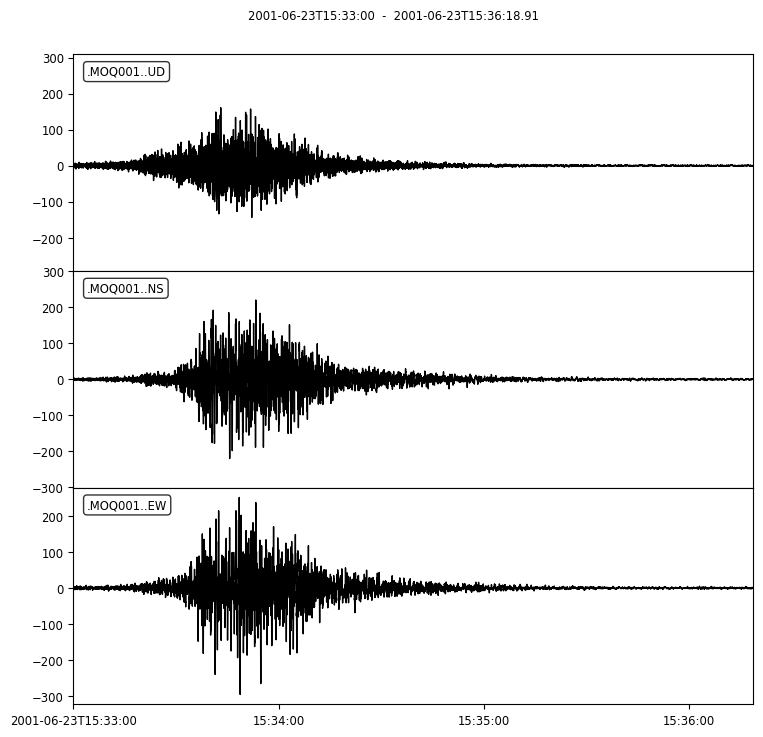

In [15]:
stream.plot()
plt.show()

In [16]:
from obspy.signal.trigger import classic_sta_lta
from obspy.signal.trigger import plot_trigger

In [17]:
df = stream[0].stats.sampling_rate

In [22]:
stream[0].stats

         network: 
         station: MOQ001
        location: 
         channel: EW
       starttime: 2001-06-23T15:33:00.000000Z
         endtime: 2001-06-23T15:36:18.910000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 19892
           calib: 1.0

In [23]:
cft = classic_sta_lta(UD_trace.data, int(5 * df), int(10 * df))

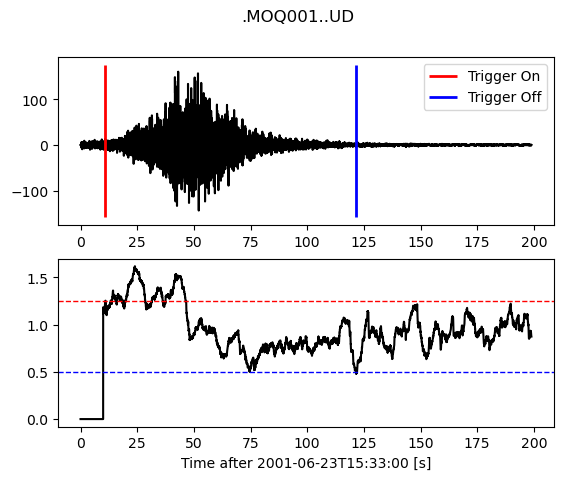

In [29]:
plot_trigger(UD_trace, cft, 1.25, 0.5)

In [30]:
from obspy.signal.trigger import z_detect

In [31]:
cft = z_detect(UD_trace.data, int(10 * df))

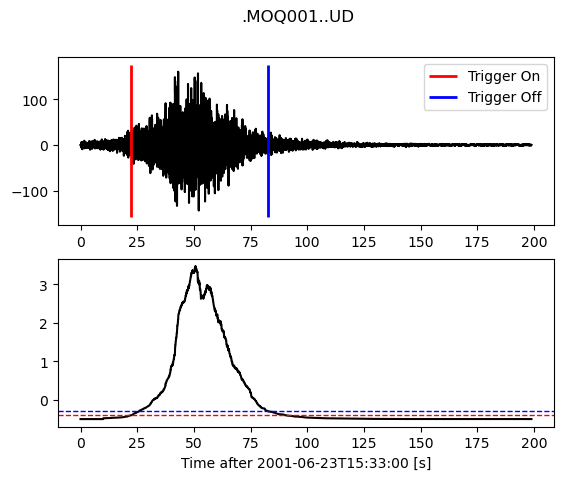

In [33]:
plot_trigger(UD_trace, cft, -0.4, -0.3)

In [2]:
st = read('datos_sismologicos/DAT_0795.sg2')

d:\Anaconda\envs\obspy\lib\site-packages\obspy\io\seg2\seg2.py:246: UserWarning: Non-zero value found in Trace's 'DELAY' field. This is not supported/tested yet and might lead to a wrong starttime of the Trace. Please contact the ObsPy developers with a sample file.
  warnings.warn(msg)
d:\Anaconda\envs\obspy\lib\site-packages\obspy\io\seg2\seg2.py:365: UserWarning: Many companies use custom defined SEG2 header variables. This might cause basic header information reflected in the single traces' stats to be wrong (e.g. recording delays, first sample number, station code names, ..). Please check the complete list of additional unmapped header fields that gets stored in Trace.stats.seg2 and/or the manual of the source of the SEG2 files for fields that might influence e.g. trace start times.
  warnings.warn(WARNING_HEADER)


In [3]:
print(st)

24 Trace(s) in Stream:

... | 2023-09-16T18:23:22.000000Z - 2023-09-16T18:23:24.047000Z | 1000.0 Hz, 2048 samples
...
(22 other traces)
...
... | 2023-09-16T18:23:22.000000Z - 2023-09-16T18:23:24.047000Z | 1000.0 Hz, 2048 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


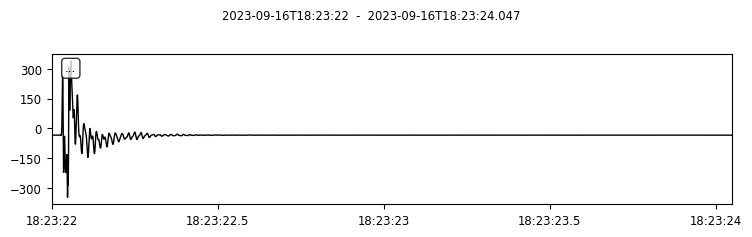

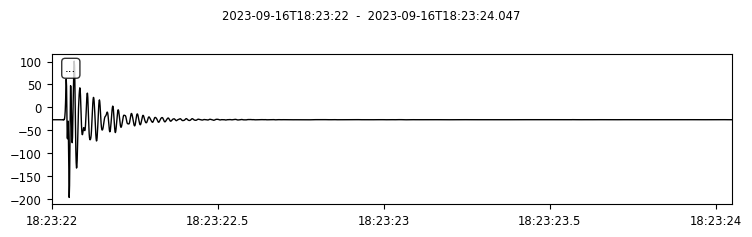

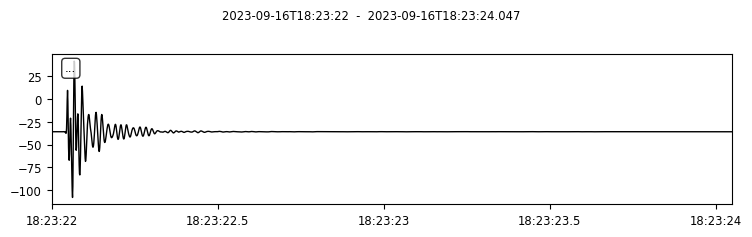

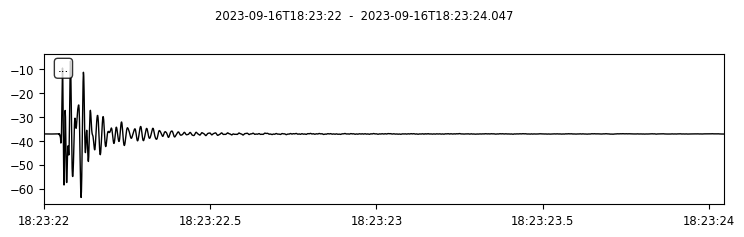

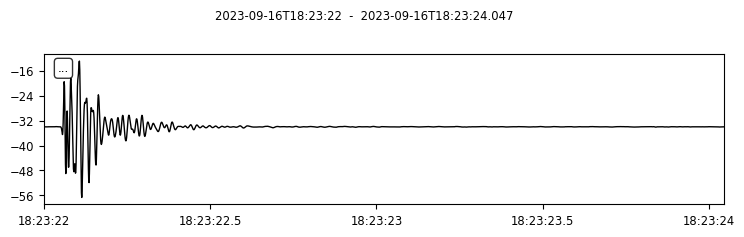

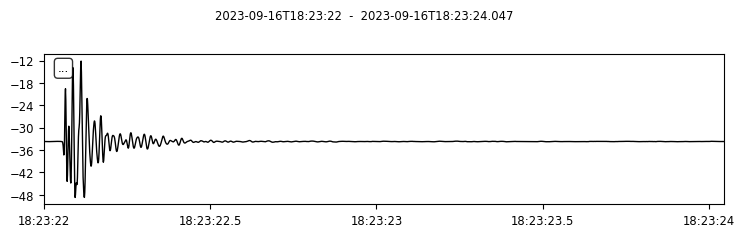

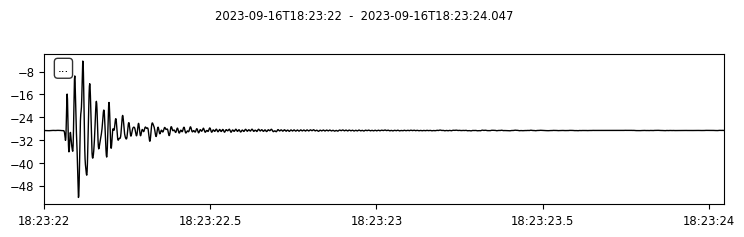

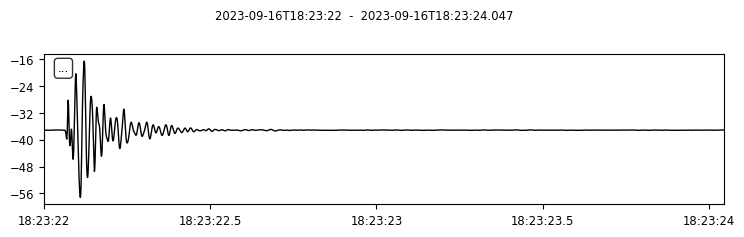

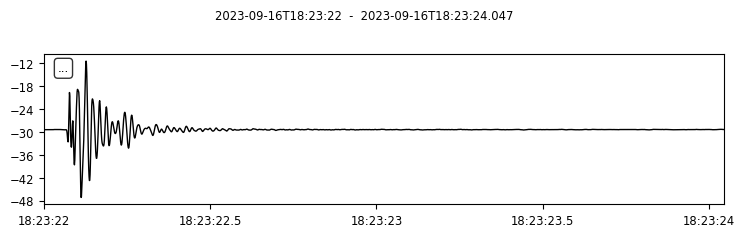

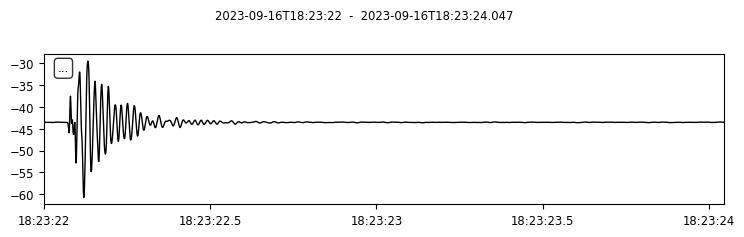

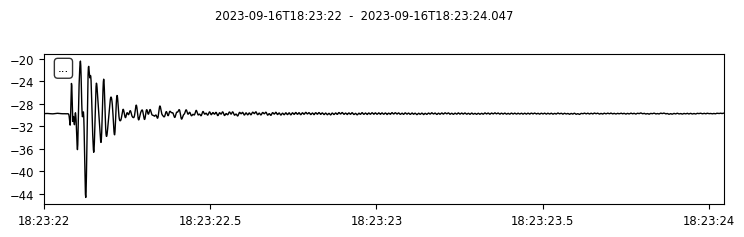

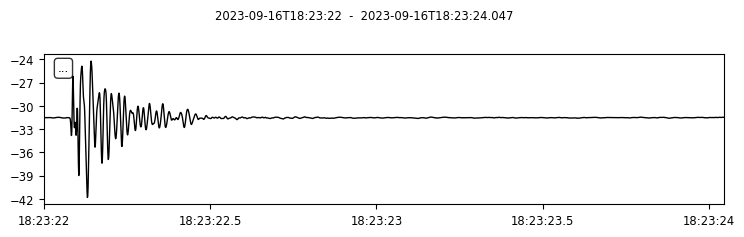

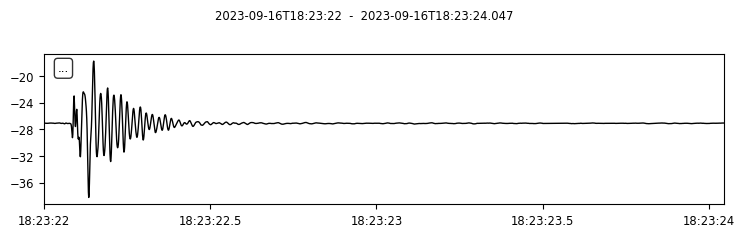

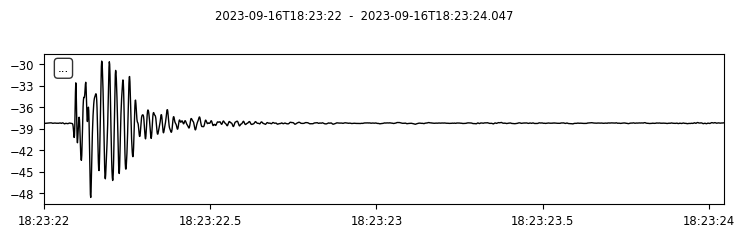

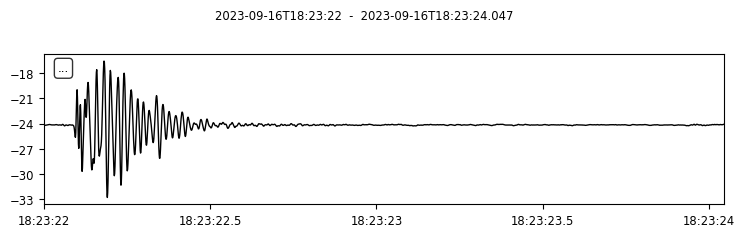

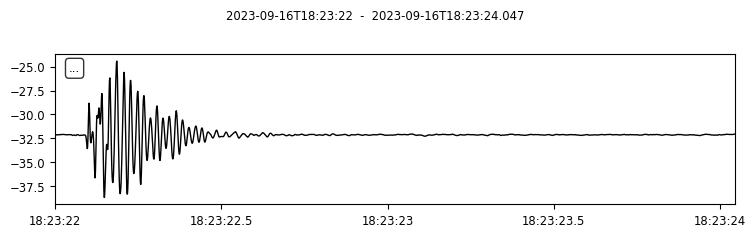

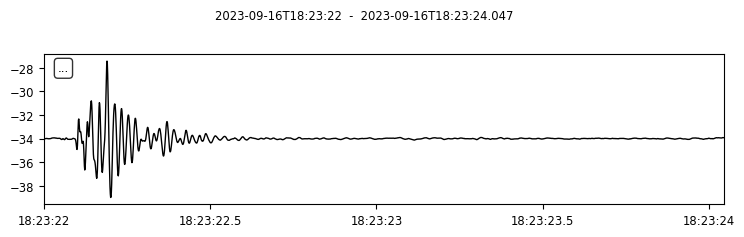

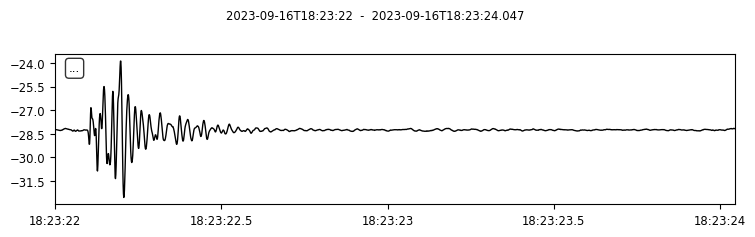

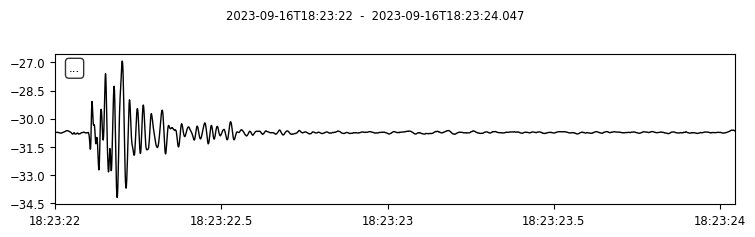

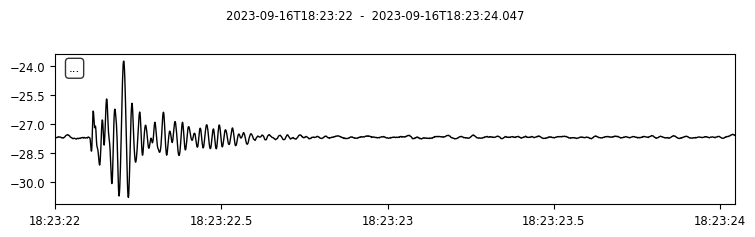

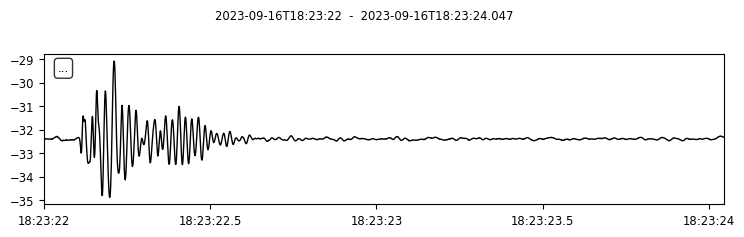

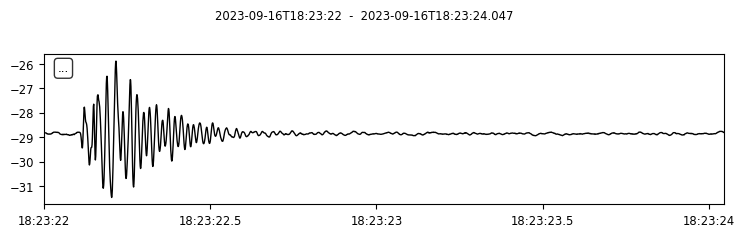

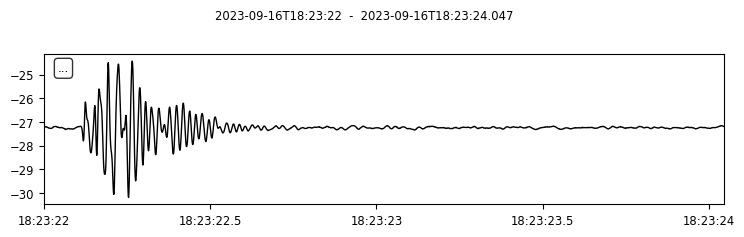

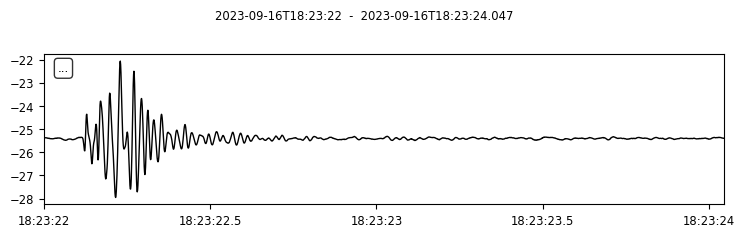

In [11]:
for tr in range(len(st)):
    tr = st[tr]
    tr.plot()